In [25]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import os
from os.path import isfile, join, getctime
import seaborn as sns
from matplotlib import pyplot as plt

In [12]:
PATH_MEAL_PHOTOS= '../data/photos_johan/'
PATH_GLUCOSE='../data/johan_glucose.csv'

In [142]:
def end_plot():
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()
from datetime import timedelta as tdel
def shift_fwd(t, h=1, m=0):
    return t+ tdel(hours=h, minutes=m)
def shift_back(t, h=1, m=0):
    return t- tdel(hours=h, minutes=m)

## Shift time by one hour first

In [148]:
def get_meals(photos_path, shift=True):
    if not(shift):
        raise Exception('NOT SHIFTING TIME?')
    files_ts = [
        # shift by one hour
    (shift_back(dt.fromtimestamp(os.stat(photos_path+f).st_mtime)), f) 
    for f in os.listdir(photos_path) if isfile(join(photos_path, f))]
    fs = [(f[0].day, f[0].hour, f[0].minute, f[0].hour*100+f[0].minute, "{}:{}".format(f[0].hour, f[0].minute), f[0], f[0], f[0].date(), f[1]) for f in files_ts]
    return pd.DataFrame(fs, columns=['day', 'hour', 'minute', 'time_fmt','time_str', 'idx','ctime', 'cdate', 'filename'])

def get_indexed_meals(photos_path, idx):
    df = get_meals(photos_path)
    return df.set_index([idx])

In [149]:
meals = get_indexed_meals(PATH_MEAL_PHOTOS, 'idx')
meals

,day,hour,minute,time_fmt,time_str,ctime,cdate,filename
idx,,,,,,,,
2020-10-03 20:05:18,3,20,5,2005,20:5,2020-10-03 20:05:18,2020-10-03,IMG_0389.jpg
2020-10-05 16:06:26,5,16,6,1606,16:6,2020-10-05 16:06:26,2020-10-05,IMG_0404.jpg
2020-10-05 19:20:10,5,19,20,1920,19:20,2020-10-05 19:20:10,2020-10-05,IMG_0413.jpg
2020-10-05 16:49:58,5,16,49,1649,16:49,2020-10-05 16:49:58,2020-10-05,IMG_0406.jpg
2020-10-05 19:19:44,5,19,19,1919,19:19,2020-10-05 19:19:44,2020-10-05,IMG_0412.jpg
2020-10-05 09:14:56,5,9,14,914,9:14,2020-10-05 09:14:56,2020-10-05,IMG_0401.jpg
2020-10-16 09:23:46,16,9,23,923,9:23,2020-10-16 09:23:46,2020-10-16,IMG_0513.jpg
2020-10-11 11:34:14,11,11,34,1134,11:34,2020-10-11 11:34:14,2020-10-11,IMG_0473.jpg
2020-10-14 07:26:40,14,7,26,726,7:26,2020-10-14 07:26:40,2020-10-14,IMG_0499.jpg


# Show meal time distribution

In [150]:
m_gday = meals.groupby('cdate')

/Users/ismail/precision/repos/glyco/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


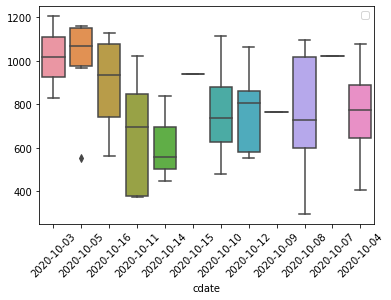

In [151]:
sns.boxplot(meals.cdate, meals.hour*60+meals.minute)
end_plot()

No handles with labels found to put in legend.


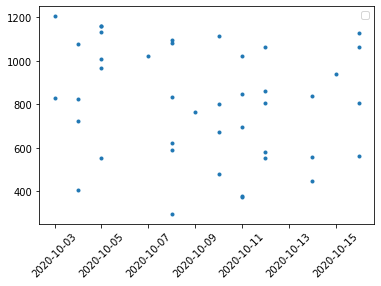

In [152]:
plt.plot(meals.cdate, meals.hour*60+meals.minute, linestyle='none', marker='.')
end_plot()

In [203]:
#def get_daily_meals(mdf):
gday =meals.groupby('cdate')

dateless = lambda x: x.hour*60+x.minute

In [204]:
mgdf = gday.count()
mgdf['cnt']= mgdf.ctime
mgdf['firstm']=gday['ctime'].min()
mgdf['lastm']=gday['ctime'].max()
mgdf['ftol']=(mgdf['lastm']-mgdf['firstm']).astype('timedelta64[h]')
mgdf['ftol']

cdate
2020-10-03     6.0
2020-10-04    11.0
2020-10-05    10.0
2020-10-07     0.0
2020-10-08    13.0
2020-10-09     0.0
2020-10-10    10.0
2020-10-11    10.0
2020-10-12     8.0
2020-10-14     6.0
2020-10-15     0.0
2020-10-16     9.0
Name: ftol, dtype: float64

In [155]:
mgdf

,day,hour,minute,time_fmt,time_str,ctime,filename,cnt
cdate,,,,,,,,
2020-10-03,2,2,2,2,2,2,2,2
2020-10-04,4,4,4,4,4,4,4,4
2020-10-05,6,6,6,6,6,6,6,6
2020-10-07,1,1,1,1,1,1,1,1
2020-10-08,6,6,6,6,6,6,6,6
2020-10-09,1,1,1,1,1,1,1,1
2020-10-10,4,4,4,4,4,4,4,4
2020-10-11,5,5,5,5,5,5,5,5
2020-10-12,5,5,5,5,5,5,5,5


cdate
2020-10-03     6.0
2020-10-04    11.0
2020-10-05    10.0
2020-10-07     0.0
2020-10-08    13.0
2020-10-09     0.0
2020-10-10    10.0
2020-10-11    10.0
2020-10-12     8.0
2020-10-14     6.0
2020-10-15     0.0
2020-10-16     9.0
Name: ftol, dtype: float64

No handles with labels found to put in legend.


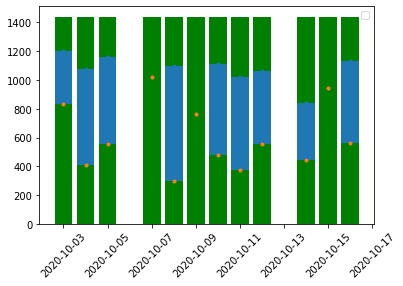

No handles with labels found to put in legend.


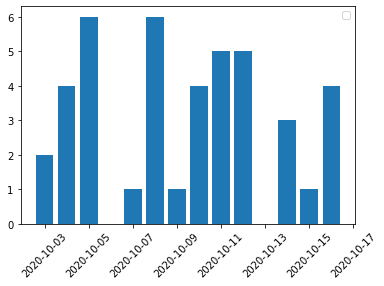

No handles with labels found to put in legend.


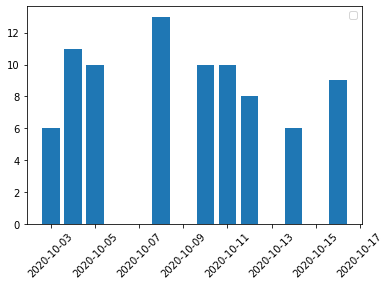

In [205]:
plt.bar(mgdf.index, mgdf.firstm.map(lambda x: 24*60), color='green')
plt.bar(mgdf.index, mgdf.lastm.map(dateless))
plt.plot(mgdf.index, mgdf.lastm.map(dateless), linestyle='none', marker='.')
plt.plot(mgdf.index, mgdf.firstm.map(dateless), linestyle='none', marker='.')
plt.bar(mgdf.index, mgdf.firstm.map(dateless), color='green')
end_plot()
plt.bar(mgdf.index, mgdf.cnt)
end_plot()
plt.bar(mgdf.index, mgdf.ftol)
end_plot()


# Select days with enough data only

In [206]:
high_days=list(mgdf[mgdf.cnt>=4].index)

In [207]:
# get meals in high days
meals['HD']=meals.index.map(lambda x: x.date() in high_days)
imeals = meals[meals.HD]

No handles with labels found to put in legend.


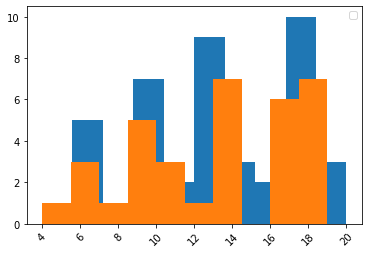

In [208]:
plt.hist(meals.hour, bins=10)
plt.hist(imeals.hour, bins=10)
end_plot()

In [209]:
imeals.ctime.max()

Timestamp('2020-10-16 18:49:56')

No handles with labels found to put in legend.


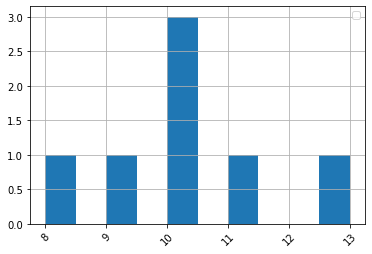

No handles with labels found to put in legend.


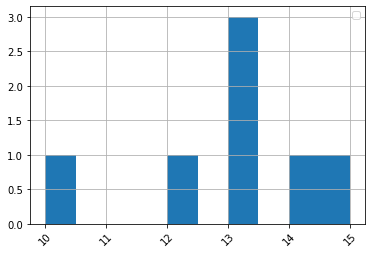

In [214]:
igday = imeals.groupby('cdate')
imgdf = igday.count()
imgdf['cnt']= mgdf.ctime
imgdf['firstm']=igday['ctime'].min()
imgdf['lastm']=igday['ctime'].max()
imgdf['ftol']=(imgdf['lastm']-imgdf['firstm']).astype('timedelta64[h]')
imgdf['ftol']
imgdf.ftol.hist()
end_plot()

imgdf.ftol.map(lambda x: 23-x).hist()
end_plot()

# Get glucose

In [221]:
glucose = pd.read_csv(PATH_GLUCOSE, skiprows=1)
glbl = 'Historic Glucose mmol/L'
tlbl = 'Device Timestamp'
t_ = 'dtime'
glucose['dtime']=pd.to_datetime(glucose[tlbl], format='%d-%m-%Y %H:%M')
glucose.set_index(t_, inplace=True)
glucose['t_']=glucose.index
glucose

,Device,Serial Number,Device Timestamp,Record Type,Historic Glucose mmol/L,Scan Glucose mmol/L,Non-numeric Rapid-Acting Insulin,Rapid-Acting Insulin (units),Non-numeric Food,Carbohydrates (grams),Carbohydrates (servings),Non-numeric Long-Acting Insulin,Long-Acting Insulin Value (units),Notes,Strip Glucose mmol/L,Ketone mmol/L,Meal Insulin (units),Correction Insulin (units),User Change Insulin (units),t_
dtime,,,,,,,,,,,,,,,,,,,,
2020-10-03 14:38:00,FreeStyle LibreLink,b657a541-5134-401b-bd5d-2b48bf6dd42e,03-10-2020 14:38,0,6.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-03 14:38:00
2020-10-03 14:53:00,FreeStyle LibreLink,b657a541-5134-401b-bd5d-2b48bf6dd42e,03-10-2020 14:53,0,5.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-03 14:53:00
2020-10-03 15:08:00,FreeStyle LibreLink,b657a541-5134-401b-bd5d-2b48bf6dd42e,03-10-2020 15:08,0,5.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-03 15:08:00
2020-10-03 15:23:00,FreeStyle LibreLink,b657a541-5134-401b-bd5d-2b48bf6dd42e,03-10-2020 15:23,0,5.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-03 15:23:00
2020-10-03 15:38:00,FreeStyle LibreLink,b657a541-5134-401b-bd5d-2b48bf6dd42e,03-10-2020 15:38,0,5.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-03 15:38:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-10 06:30:00,FreeStyle LibreLink,b657a541-5134-401b-bd5d-2b48bf6dd42e,10-10-2020 06:30,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-10 06:30:00
2020-10-11 12:16:00,FreeStyle LibreLink,b657a541-5134-401b-bd5d-2b48bf6dd42e,11-10-2020 12:16,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-11 12:16:00
2020-10-14 17:36:00,FreeStyle LibreLink,b657a541-5134-401b-bd5d-2b48bf6dd42e,14-10-2020 17:36,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-14 17:36:00


# Analyze peaks

In [215]:
def get_integral(df, g_lbl):
    return sum((df.t_.diff() * df[g_lbl]).dropna())

In [216]:
def derive(recv):
    return recv.diff()/recv.index.to_series().diff().dt.total_seconds()

In [217]:
def time_diff(recv): 
    return recv.index.to_series().diff().dt.total_seconds()

<AxesSubplot:xlabel='dtime'>

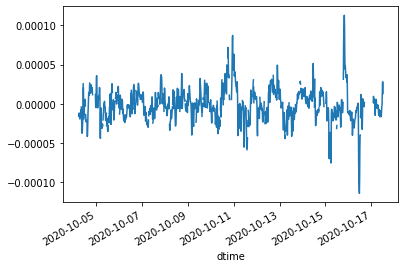

In [226]:
derive(glucose[glbl]).rolling(60).mean().plot()

<AxesSubplot:xlabel='dtime'>

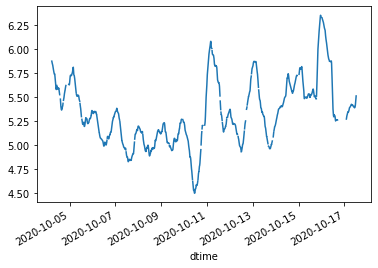

In [227]:
glucose[glbl].rolling(60).mean().plot()